Using the VA state data to fit a distribution to the number of COVID-19 new cases

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image


Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that

In [2]:
data = pd.read_csv("../../../data/stage_1/long_large_covid.csv")
data

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
0,0,Statewide Unallocated,AL,1,2020-01-22,0,0,0
1,0,Statewide Unallocated,AL,1,2020-01-23,0,0,0
2,0,Statewide Unallocated,AL,1,2020-01-24,0,0,0
3,0,Statewide Unallocated,AL,1,2020-01-25,0,0,0
4,0,Statewide Unallocated,AL,1,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
1829584,56045,Weston County,WY,56,2021-08-12,700,6,6927
1829585,56045,Weston County,WY,56,2021-08-13,700,6,6927
1829586,56045,Weston County,WY,56,2021-08-14,705,6,6927
1829587,56045,Weston County,WY,56,2021-08-15,705,6,6927


In [3]:
#Removing the statewide unallocated data as it cannot be useful for county wise statistics
data= data[data['County Name'] != 'Statewide Unallocated']
data

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
573,1001,Autauga County,AL,1,2020-01-22,0,0,55869
574,1001,Autauga County,AL,1,2020-01-23,0,0,55869
575,1001,Autauga County,AL,1,2020-01-24,0,0,55869
576,1001,Autauga County,AL,1,2020-01-25,0,0,55869
577,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
1829584,56045,Weston County,WY,56,2021-08-12,700,6,6927
1829585,56045,Weston County,WY,56,2021-08-13,700,6,6927
1829586,56045,Weston County,WY,56,2021-08-14,705,6,6927
1829587,56045,Weston County,WY,56,2021-08-15,705,6,6927


In [4]:
data['Date'] = data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [5]:
# choosing the VA state
VA_state = data[data['State'] == "VA"]
VA_state.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
1642791,51001,Accomack County,VA,51,2020-01-22,0,0,32316
1642792,51001,Accomack County,VA,51,2020-01-23,0,0,32316
1642793,51001,Accomack County,VA,51,2020-01-24,0,0,32316
1642794,51001,Accomack County,VA,51,2020-01-25,0,0,32316
1642795,51001,Accomack County,VA,51,2020-01-26,0,0,32316


In [6]:
VA_state['New Cases Per Day'] = VA_state['Cases'].diff()
VA_state['New Deaths Per Day'] = VA_state['Death'].diff()
VA_state

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population,New Cases Per Day,New Deaths Per Day
1642791,51001,Accomack County,VA,51,2020-01-22,0,0,32316,NaN,NaN
1642792,51001,Accomack County,VA,51,2020-01-23,0,0,32316,0.0,0.0
1642793,51001,Accomack County,VA,51,2020-01-24,0,0,32316,0.0,0.0
1642794,51001,Accomack County,VA,51,2020-01-25,0,0,32316,0.0,0.0
1642795,51001,Accomack County,VA,51,2020-01-26,0,0,32316,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1718995,51840,City of Winchester,VA,51,2021-08-12,3041,49,28078,11.0,0.0
1718996,51840,City of Winchester,VA,51,2021-08-13,3054,49,28078,13.0,0.0
1718997,51840,City of Winchester,VA,51,2021-08-14,3054,49,28078,0.0,0.0
1718998,51840,City of Winchester,VA,51,2021-08-15,3054,49,28078,0.0,0.0


In [7]:
VA_state =VA_state[VA_state.Date != '2020-01-22']

In [8]:
VA_state

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population,New Cases Per Day,New Deaths Per Day
1642792,51001,Accomack County,VA,51,2020-01-23,0,0,32316,0.0,0.0
1642793,51001,Accomack County,VA,51,2020-01-24,0,0,32316,0.0,0.0
1642794,51001,Accomack County,VA,51,2020-01-25,0,0,32316,0.0,0.0
1642795,51001,Accomack County,VA,51,2020-01-26,0,0,32316,0.0,0.0
1642796,51001,Accomack County,VA,51,2020-01-27,0,0,32316,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1718995,51840,City of Winchester,VA,51,2021-08-12,3041,49,28078,11.0,0.0
1718996,51840,City of Winchester,VA,51,2021-08-13,3054,49,28078,13.0,0.0
1718997,51840,City of Winchester,VA,51,2021-08-14,3054,49,28078,0.0,0.0
1718998,51840,City of Winchester,VA,51,2021-08-15,3054,49,28078,0.0,0.0


In [9]:
# group by Date
VA_data = VA_state.groupby(["Date"]).sum().reset_index()
VA_data

,Date,countyFIPS,StateFIPS,Cases,Death,Population,New Cases Per Day,New Deaths Per Day
0,2020-01-23,6818111,6783,0,0,8535519,0.0,0.0
1,2020-01-24,6818111,6783,0,0,8535519,0.0,0.0
2,2020-01-25,6818111,6783,0,0,8535519,0.0,0.0
3,2020-01-26,6818111,6783,0,0,8535519,0.0,0.0
4,2020-01-27,6818111,6783,0,0,8535519,0.0,0.0
...,...,...,...,...,...,...,...,...
567,2021-08-12,6818111,6783,715556,11583,8535519,2361.0,2.0
568,2021-08-13,6818111,6783,717826,11599,8535519,2270.0,16.0
569,2021-08-14,6818111,6783,717826,11599,8535519,0.0,0.0
570,2021-08-15,6818111,6783,717826,11599,8535519,0.0,0.0


In [10]:
#Normalization with Population
VA_data['New Cases Per Day (Normalized)']= round((VA_data['New Cases Per Day']/VA_data['Population'])*100000,2)
VA_data['New Deaths Per Day (Normalized)']= round((VA_data['New Deaths Per Day']/VA_data['Population'])*100000,2)


In [11]:
VA_data_week = VA_data.groupby([ pd.Grouper(key='Date', freq='w')])['New Cases Per Day','New Deaths Per Day'].agg({'New Cases Per Day':'mean',
                                                                                                'New Deaths Per Day' :'mean'}).round().reset_index()
VA_data_week

,Date,New Cases Per Day,New Deaths Per Day
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
...,...,...,...
78,2021-07-25,543.0,3.0
79,2021-08-01,869.0,5.0
80,2021-08-08,1469.0,4.0
81,2021-08-15,1880.0,6.0


In [12]:
# calculating mean
VA_mean = VA_data_week['New Cases Per Day'].mean()
VA_mean

1306.578313253012

In [13]:
VA_data_week['VA PMF'] = stats.poisson.pmf(k=VA_data_week['New Cases Per Day'].round(decimals=0), mu=VA_mean)
VA_data_week

,Date,New Cases Per Day,New Deaths Per Day,VA PMF
0,2020-01-26,0.0,0.0,0.000000e+00
1,2020-02-02,0.0,0.0,0.000000e+00
2,2020-02-09,0.0,0.0,0.000000e+00
3,2020-02-16,0.0,0.0,0.000000e+00
4,2020-02-23,0.0,0.0,0.000000e+00
...,...,...,...,...
78,2021-07-25,543.0,3.0,4.795512e-127
79,2021-08-01,869.0,5.0,1.016314e-38
80,2021-08-08,1469.0,4.0,6.370421e-07
81,2021-08-15,1880.0,6.0,8.233170e-51


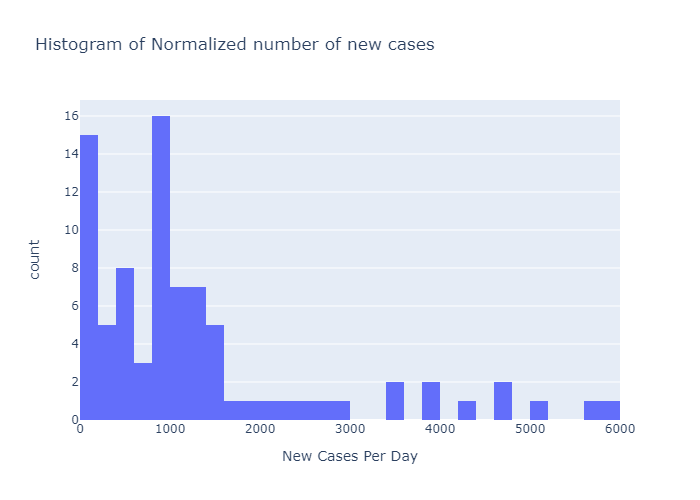

In [14]:
fig1 = px.histogram(VA_data_week, x='New Cases Per Day',nbins=50,title='Histogram of Normalized number of new cases ')
fig1.write_image("../../../Images/member/Varsha/stage_3/fig1.png")
img_bytes = fig1.to_image(format="png")
Image(img_bytes)

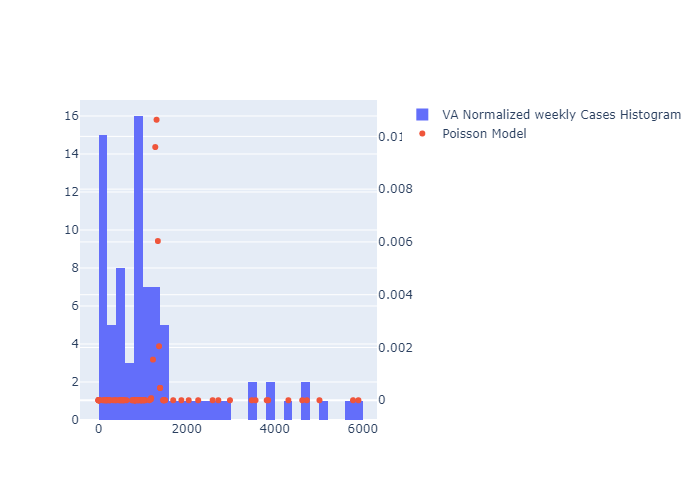

In [15]:
# Calculate the pmf values using the poission distribution and plot
fig2 = go.Figure()
# Create figure with secondary y-axis
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Histogram(x=VA_data_week['New Cases Per Day'],nbinsx=40,name="VA Normalized weekly Cases Histogram"))
fig2.add_trace(go.Scatter(x=VA_data_week['New Cases Per Day'],y=VA_data_week['VA PMF'],mode='markers', name="Poisson Model"), secondary_y=True)
fig2.write_image("../../../Images/member/Varsha/stage_3/fig2.png")
img_bytes = fig2.to_image(format="png")
Image(img_bytes)

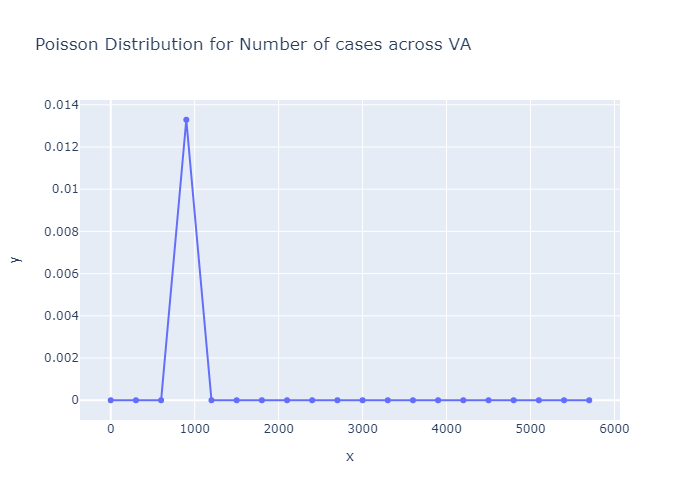

In [16]:
fig3 = px.scatter(VA_data_week, x=range(0,6000,300), y=stats.poisson.pmf(k=range(0,6000,300),mu=901),title='Poisson Distribution for Number of cases across VA')
fig3.update_traces(mode='lines+markers')
fig3.write_image("../../../Images/member/Varsha/stage_3/fig3.png")
img_bytes = fig3.to_image(format="png")
Image(img_bytes)

Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook

In [17]:
VA_data_week['New Cases Per Day'].mean()


1306.578313253012

In [18]:
VA_data_week['New Cases Per Day'].var()

1898394.7102556564

In [19]:
VA_data_week['New Cases Per Day'].skew()

1.7478233451315404

In [20]:
VA_data_week['New Cases Per Day'].kurt()

2.5908119970838843

Compare the data against other states

In [21]:
states= data[data["State"].isin(["NC", "SC", "NY", "FL", "AL","VA"])]
states

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
573,1001,Autauga County,AL,1,2020-01-22,0,0,55869
574,1001,Autauga County,AL,1,2020-01-23,0,0,55869
575,1001,Autauga County,AL,1,2020-01-24,0,0,55869
576,1001,Autauga County,AL,1,2020-01-25,0,0,55869
577,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
1718995,51840,City of Winchester,VA,51,2021-08-12,3041,49,28078
1718996,51840,City of Winchester,VA,51,2021-08-13,3054,49,28078
1718997,51840,City of Winchester,VA,51,2021-08-14,3054,49,28078
1718998,51840,City of Winchester,VA,51,2021-08-15,3054,49,28078


In [22]:
states['New Cases Per Day'] = states['Cases'].diff()
states['New Deaths Per Day'] = states['Death'].diff()
states

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population,New Cases Per Day,New Deaths Per Day
573,1001,Autauga County,AL,1,2020-01-22,0,0,55869,NaN,NaN
574,1001,Autauga County,AL,1,2020-01-23,0,0,55869,0.0,0.0
575,1001,Autauga County,AL,1,2020-01-24,0,0,55869,0.0,0.0
576,1001,Autauga County,AL,1,2020-01-25,0,0,55869,0.0,0.0
577,1001,Autauga County,AL,1,2020-01-26,0,0,55869,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1718995,51840,City of Winchester,VA,51,2021-08-12,3041,49,28078,11.0,0.0
1718996,51840,City of Winchester,VA,51,2021-08-13,3054,49,28078,13.0,0.0
1718997,51840,City of Winchester,VA,51,2021-08-14,3054,49,28078,0.0,0.0
1718998,51840,City of Winchester,VA,51,2021-08-15,3054,49,28078,0.0,0.0


In [23]:
# changing negatives:
num = states['New Cases Per Day']._get_numeric_data()
num[num < 0] = 0
num1 = states['New Deaths Per Day']._get_numeric_data()
num1[num1 < 0] = 0

In [24]:
states= states[states['Date'] != '2020-01-22']

In [25]:
states = states.groupby(["State","Date"]).sum().reset_index()
states

,State,Date,countyFIPS,StateFIPS,Cases,Death,Population,New Cases Per Day,New Deaths Per Day
0,AL,2020-01-23,71489,67,0,0,4903185,0.0,0.0
1,AL,2020-01-24,71489,67,0,0,4903185,0.0,0.0
2,AL,2020-01-25,71489,67,0,0,4903185,0.0,0.0
3,AL,2020-01-26,71489,67,0,0,4903185,0.0,0.0
4,AL,2020-01-27,71489,67,0,0,4903185,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3427,VA,2021-08-12,6818111,6783,715556,11583,8535519,2365.0,2.0
3428,VA,2021-08-13,6818111,6783,717826,11599,8535519,2272.0,16.0
3429,VA,2021-08-14,6818111,6783,717826,11599,8535519,0.0,0.0
3430,VA,2021-08-15,6818111,6783,717826,11599,8535519,0.0,0.0


In [26]:
#Normalizing
states['New Cases Per Day Normalized']= (states['New Cases Per Day']/states['Population'])*100000
states['New Deaths Per Day Normalized']= (states['New Deaths Per Day']/states['Population'])*100000
states_1 = states
states

,State,Date,countyFIPS,StateFIPS,Cases,Death,Population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized
0,AL,2020-01-23,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
1,AL,2020-01-24,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
2,AL,2020-01-25,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
3,AL,2020-01-26,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
4,AL,2020-01-27,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3427,VA,2021-08-12,6818111,6783,715556,11583,8535519,2365.0,2.0,27.707747,0.023431
3428,VA,2021-08-13,6818111,6783,717826,11599,8535519,2272.0,16.0,26.618182,0.187452
3429,VA,2021-08-14,6818111,6783,717826,11599,8535519,0.0,0.0,0.000000,0.000000
3430,VA,2021-08-15,6818111,6783,717826,11599,8535519,0.0,0.0,0.000000,0.000000


In [27]:
#Grouping by week and finding the mean
states_weekly = states.groupby(["State", pd.Grouper(key='Date', freq='w')])['New Cases Per Day Normalized','New Deaths Per Day Normalized'].agg({'New Cases Per Day Normalized':'mean',
 
                                                                                                                                             'New Deaths Per Day Normalized' :'mean'}).reset_index()
states_weekly

,State,Date,New Cases Per Day Normalized,New Deaths Per Day Normalized
0,AL,2020-01-26,0.000000,0.000000
1,AL,2020-02-02,0.000000,0.000000
2,AL,2020-02-09,0.000000,0.000000
3,AL,2020-02-16,0.000000,0.000000
4,AL,2020-02-23,0.000000,0.000000
...,...,...,...,...
493,VA,2021-07-25,6.493872,0.053558
494,VA,2021-08-01,10.380154,0.080337
495,VA,2021-08-08,17.220478,0.051884
496,VA,2021-08-15,22.060756,0.071968


In [28]:
#Calculate the mean of the Num of cases per day normalized
compared_states_weekly_data_cases_stats=states_weekly.groupby('State')['New Cases Per Day Normalized'].agg('mean').reset_index().round(decimals=0)
compared_states_weekly_data_cases_stats

,State,New Cases Per Day Normalized
0,AL,24.0
1,FL,23.0
2,NC,20.0
3,NY,20.0
4,SC,25.0
5,VA,15.0


In [29]:
#Calculate the mean of the Num of Deaths per day normalized
compared_states_weekly_data_Deaths_stats=states_weekly.groupby('State')['New Deaths Per Day Normalized'].agg('mean').reset_index().round(decimals=0)
compared_states_weekly_data_Deaths_stats

,State,New Deaths Per Day Normalized
0,AL,0.0
1,FL,0.0
2,NC,0.0
3,NY,0.0
4,SC,0.0
5,VA,0.0


In [30]:
# plotting the histogram for all 6 states
fig4 = px.histogram(states_weekly, x='New Cases Per Day Normalized',nbins=50,title='Histogram of Normalized number of new cases ')

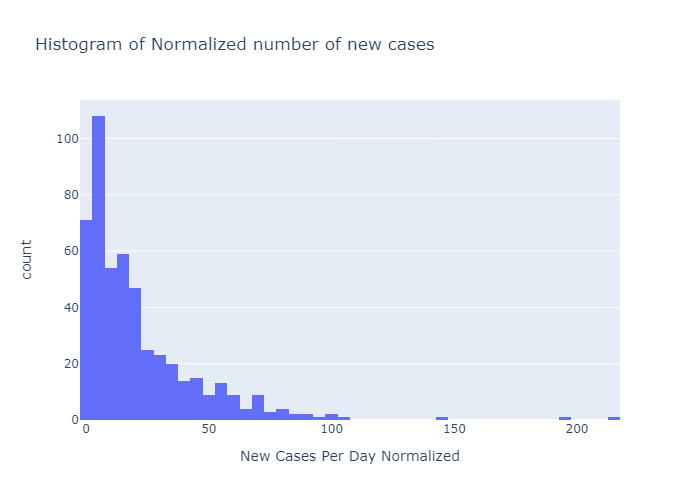

In [31]:
fig4.write_image("../../../Images/member/Varsha/stage_3/fig4.png")
img_bytes = fig4.to_image(format="png")
Image(img_bytes)

In [32]:
# plotting the histogram for all 6 states
fig5 = px.histogram(states_weekly, x='New Deaths Per Day Normalized',nbins=50,title='Histogram of Normalized number of new Deaths ')

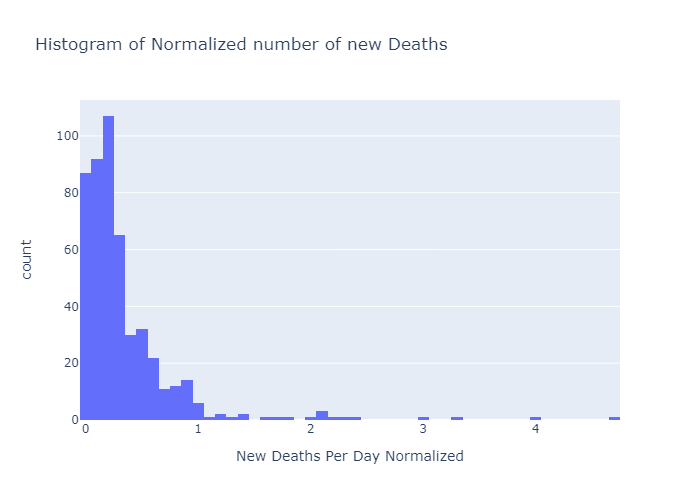

In [33]:
fig5.write_image("../../../Images/member/Varsha/stage_3/fig5.png")
img_bytes = fig5.to_image(format="png")
Image(img_bytes)

In [34]:
k_values = range(0,150,10)
states = compared_states_weekly_data_cases_stats['State']
means = compared_states_weekly_data_cases_stats['New Cases Per Day Normalized']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_cases=pd.DataFrame.from_dict(data_dict)

In [35]:
poisson_data_cases

,state,mean,k_value,probability
0,AL,24.0,0,3.775135e-11
1,AL,24.0,10,6.596018e-04
2,AL,24.0,20,6.237817e-02
3,AL,24.0,30,3.627518e-02
4,AL,24.0,40,7.477166e-04
...,...,...,...,...
85,VA,15.0,100,1.332616e-47
86,VA,15.0,110,4.515477e-56
87,VA,15.0,120,6.182157e-65
88,VA,15.0,130,3.687681e-74


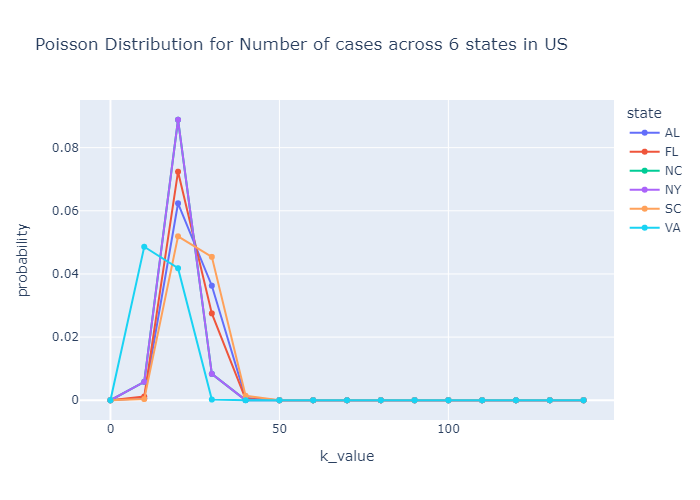

In [36]:
#plot the poisson distribution cases
fig6 = px.scatter(poisson_data_cases, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of cases across 6 states in US')
fig6.update_traces(mode='lines+markers')
fig6.write_image("../../../Images/member/Varsha/stage_3/fig6.png")
img_bytes = fig6.to_image(format="png")
Image(img_bytes)

Model a poission distribution of new COVID-19 cases and deaths of a state and compare to other 5 states

In [37]:
k_values = range(0,50,10)
states = compared_states_weekly_data_Deaths_stats['State']
means = compared_states_weekly_data_Deaths_stats['New Deaths Per Day Normalized']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_deaths=pd.DataFrame.from_dict(data_dict)
poisson_data_deaths

,state,mean,k_value,probability
0,AL,0.0,0,1.0
1,AL,0.0,10,0.0
2,AL,0.0,20,0.0
3,AL,0.0,30,0.0
4,AL,0.0,40,0.0
5,FL,0.0,0,1.0
6,FL,0.0,10,0.0
7,FL,0.0,20,0.0
8,FL,0.0,30,0.0
9,FL,0.0,40,0.0


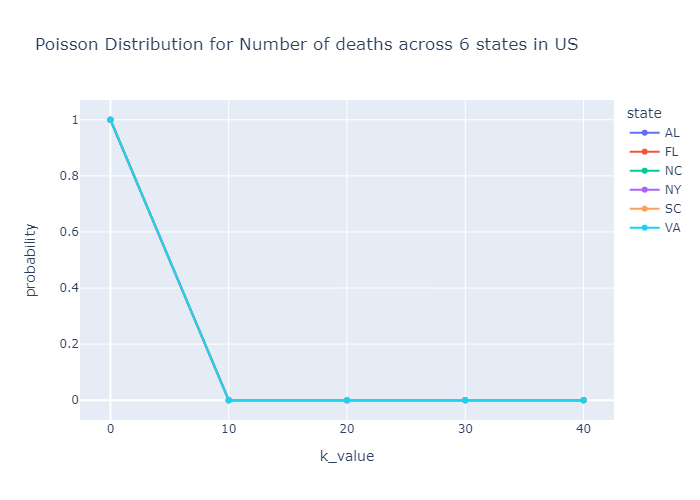

In [38]:
#plot the poisson distribution for deaths
fig7 = px.scatter(poisson_data_deaths, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of deaths across 6 states in US')
fig7.update_traces(mode='lines+markers')
fig7.write_image("../../../Images/member/Varsha/stage_3/fig7.png")
img_bytes = fig7.to_image(format="png")
Image(img_bytes)

In [39]:
states_weekly['New Cases Per Day Normalized'].mean()


21.225172246807766

In [40]:
states_weekly['New Cases Per Day Normalized'].var()


601.1644322282428

In [41]:
states_weekly['New Cases Per Day Normalized'].skew()


2.7678376099391735

In [42]:
states_weekly['New Cases Per Day Normalized'].kurt()



13.48950255933966

Perform corelation between Enrichment data valiables and COVID-19 cases to observe patterns

In [43]:
president_county_candidate = pd.read_csv("../../../data/stage_1/president_county_candidate.csv")
president_county_candidate

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [44]:
president_county_candidate['county'] = president_county_candidate['county'].apply(lambda cn: cn.strip())

In [45]:
#Rename the column names in the President County Candidate data set
president_county_candidate = president_county_candidate.rename(columns={'state':'State','county':'County Name'})
president_county_candidate['State'] = president_county_candidate['State'].replace(['Delaware','District of Columbia','Alabama','Alaska',
                               'Arizona','Arkansas','California','Colorado','Connecticut','Florida','Georgia','Hawaii',
                                'Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland',
                                'Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska',
                                'Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina',
                                'North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
                                'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia',
                                'Wisconsin','Wyoming'],['DE','DC','AL','AK','AZ','AR','CA','CO','CT','FL','GA','HI','ID',
                                'IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
                                'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV',
                                'WI','WY'])
president_county_candidate

,State,County Name,candidate,party,total_votes,won
0,DE,Kent County,Joe Biden,DEM,44552,True
1,DE,Kent County,Donald Trump,REP,41009,False
2,DE,Kent County,Jo Jorgensen,LIB,1044,False
3,DE,Kent County,Howie Hawkins,GRN,420,False
4,DE,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,AZ,Maricopa County,Write-ins,WRI,1331,False
32173,AZ,Mohave County,Donald Trump,REP,78535,True
32174,AZ,Mohave County,Joe Biden,DEM,24831,False
32175,AZ,Mohave County,Jo Jorgensen,LIB,1302,False


In [46]:
Population=pd.read_csv("../../../data/stage_1/covid_county_population_usafacts.csv")
Population

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


In [47]:
# group by state and choosing the six states data
Population = Population.groupby(['State']).sum().reset_index()
Population= Population[Population["State"].isin(["NC", "SC", "NY", "FL", "AL","VA"])].reset_index()
Population.head()

,index,State,countyFIPS,population
0,1,AL,71489,4903185
1,9,FL,808550,21477737
2,27,NC,3710000,10488084
3,34,NY,2235844,19453561
4,40,SC,2072116,5148714


In [48]:
# taking the 6 states data from above task
states_1

,State,Date,countyFIPS,StateFIPS,Cases,Death,Population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized
0,AL,2020-01-23,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
1,AL,2020-01-24,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
2,AL,2020-01-25,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
3,AL,2020-01-26,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
4,AL,2020-01-27,71489,67,0,0,4903185,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3427,VA,2021-08-12,6818111,6783,715556,11583,8535519,2365.0,2.0,27.707747,0.023431
3428,VA,2021-08-13,6818111,6783,717826,11599,8535519,2272.0,16.0,26.618182,0.187452
3429,VA,2021-08-14,6818111,6783,717826,11599,8535519,0.0,0.0,0.000000,0.000000
3430,VA,2021-08-15,6818111,6783,717826,11599,8535519,0.0,0.0,0.000000,0.000000


In [49]:
# grouping by state 
states_1 = states_1.groupby(['State']).sum().reset_index()
states_1

,State,countyFIPS,StateFIPS,Cases,Death,Population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized
0,AL,40891708,38324,150187978,2830886,2804621820,638246.0,11958.0,13016.967543,243.882293
1,FL,462490600,459888,621451793,10183480,12285265564,2904964.0,37494.0,13525.465928,174.571464
2,NC,2122120000,2116400,255236214,3435069,5999184048,1133335.0,14254.0,10805.929853,135.906616
3,NY,1278902768,1276704,544999563,19456298,11127436892,2192843.0,53684.0,11272.193302,275.959759
4,SC,1185250352,1184040,153253223,2642837,2945064408,669631.0,10244.0,13005.791349,198.962304
5,VA,3899959492,3879876,173000282,2892108,4882316868,728262.0,11980.0,8532.134953,140.354676


In [50]:
# replacing the population with president_county_candiadate 
states_1['Population']=Population['population']

In [51]:
# removing unnessary columns
states_1 = states_1.drop(columns="countyFIPS")
states_1 = states_1.drop(columns="StateFIPS")
states_1

,State,Cases,Death,Population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized
0,AL,150187978,2830886,4903185,638246.0,11958.0,13016.967543,243.882293
1,FL,621451793,10183480,21477737,2904964.0,37494.0,13525.465928,174.571464
2,NC,255236214,3435069,10488084,1133335.0,14254.0,10805.929853,135.906616
3,NY,544999563,19456298,19453561,2192843.0,53684.0,11272.193302,275.959759
4,SC,153253223,2642837,5148714,669631.0,10244.0,13005.791349,198.962304
5,VA,173000282,2892108,8535519,728262.0,11980.0,8532.134953,140.354676


In [52]:
# grouping by state
president_county_candidate= president_county_candidate.groupby(['State']).sum().reset_index()
president_county_candidate.head()

,State,total_votes,won
0,AK,391346,40
1,AL,2323304,67
2,AR,1219069,75
3,AZ,3387326,15
4,CA,17495906,58


In [53]:
# merging two datasets
merged_data = pd.merge(states_1, president_county_candidate, how='inner', on =['State'])
merged_data

,State,Cases,Death,Population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized,total_votes,won
0,AL,150187978,2830886,4903185,638246.0,11958.0,13016.967543,243.882293,2323304,67
1,FL,621451793,10183480,21477737,2904964.0,37494.0,13525.465928,174.571464,11067456,67
2,NC,255236214,3435069,10488084,1133335.0,14254.0,10805.929853,135.906616,5524801,100
3,NY,544999563,19456298,19453561,2192843.0,53684.0,11272.193302,275.959759,8613546,62
4,SC,153253223,2642837,5148714,669631.0,10244.0,13005.791349,198.962304,2513329,46
5,VA,173000282,2892108,8535519,728262.0,11980.0,8532.134953,140.354676,4460524,133


In [54]:
# Normalizing with population
merged_data['total_votes']= (merged_data['total_votes']/merged_data['Population'])*100000
merged_data['won']= (merged_data['won']/merged_data['Population'])*100000
merged_data

,State,Cases,Death,Population,New Cases Per Day,New Deaths Per Day,New Cases Per Day Normalized,New Deaths Per Day Normalized,total_votes,won
0,AL,150187978,2830886,4903185,638246.0,11958.0,13016.967543,243.882293,47383.568028,1.366459
1,FL,621451793,10183480,21477737,2904964.0,37494.0,13525.465928,174.571464,51529.898145,0.311951
2,NC,255236214,3435069,10488084,1133335.0,14254.0,10805.929853,135.906616,52676.933175,0.953463
3,NY,544999563,19456298,19453561,2192843.0,53684.0,11272.193302,275.959759,44277.477013,0.318708
4,SC,153253223,2642837,5148714,669631.0,10244.0,13005.791349,198.962304,48814.694310,0.893427
5,VA,173000282,2892108,8535519,728262.0,11980.0,8532.134953,140.354676,52258.380539,1.558195


In [55]:
merged_data.to_csv("../../../data/stage_1/presidential_sixstates_merged.csv")


Correlation between Enrichment data valiables and COVID-19 cases

In [56]:
merged_data['New Cases Per Day Normalized'].corr(merged_data['total_votes'])

-0.30062347646940485

In [57]:
merged_data['New Deaths Per Day Normalized'].corr(merged_data['total_votes'])

-0.9818956567965462

In [58]:
merged_data['New Cases Per Day Normalized'].corr(merged_data['won'])

-0.4821807526750586

In [59]:
merged_data['New Deaths Per Day Normalized'].corr(merged_data['won'])

-0.35297186491534205

From the above correlation, in all the six states, we observe that the correlation between total votes , i.e, the number of total votes in the sense that there was negative corralation with both cases and deaths. This shows that Voting doesn't increase the covid cases and deaths.